<a href="https://colab.research.google.com/github/shoham529-byte/1-repo/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [117]:
titanic=pd.read_csv('/titanic.csv')
print(f"Dataset shape: {titanic.shape}")
titanic.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
print("Null values per column:")
print(titanic.isnull().sum())

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [119]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

X = np.array(titanic.drop('Survived', axis=1))
Y = np.array(titanic['Survived']).reshape(-1, 1)

/tmp/ipython-input-2861140439.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
/tmp/ipython-input-2861140439.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [120]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [121]:
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
split = int(0.8 * X.shape[0])

train_idx, test_idx = indices[:split], indices[split:]
X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]

In [122]:
W, b, losses = train_logistic_regression(X_train, Y_train, )

In [123]:
Y_pred_train = predict(X_train, W, b)
Y_pred_test = predict(X_test, W, b)

In [124]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-9)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-9)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r + 1e-9)

In [125]:
train_acc = accuracy(Y_train, Y_pred_train)
test_acc = accuracy(Y_test, Y_pred_test)
prec = precision(Y_test, Y_pred_test)
rec = recall(Y_test, Y_pred_test)
f1 = f1_score(Y_test, Y_pred_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Training Accuracy: 0.7921
Testing Accuracy : 0.8156
Precision: 0.7581
Recall: 0.7231
F1 Score: 0.7402


In [126]:
tp = np.sum((Y_test == 1) & (Y_pred_test == 1))
tn = np.sum((Y_test == 0) & (Y_pred_test == 0))
fp = np.sum((Y_test == 0) & (Y_pred_test == 1))
fn = np.sum((Y_test == 1) & (Y_pred_test == 0))

conf_matrix = np.array([[tn, fp],
                        [fn, tp]])

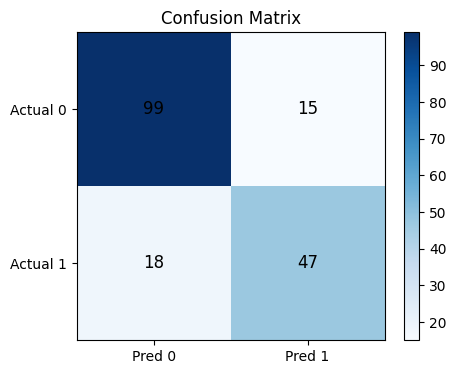

In [127]:
plt.figure(figsize=(5,4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks([0,1], ['Pred 0', 'Pred 1'])
plt.yticks([0,1], ['Actual 0', 'Actual 1'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)
plt.colorbar()
plt.show()